# Name: V Raghav Anand

# Register Number: 19BCE1415

# Machine Learning Lab (CSE4020)

# Faculty: Prof. Abdul Quadir MD

# KNN AND WEIGHTED KNN

In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
import matplotlib.pyplot as plt
from pandas import DataFrame

## Generating synthetic dataset for 30 records

In [3]:
l1,l2=list(np.random.uniform(1, 16, 30)),list(np.random.uniform(1, 16, 30))
class0=[(l1[i],l2[i],0) for i in range(15)]
class1=[(l1[i],l2[i],1) for i in range(15,30)]
data=class1+class0
data

[(1.7315055874752803, 9.155214827493024, 1),
 (3.492488662671764, 6.7757529489341, 1),
 (3.3921028791495424, 12.544918947219859, 1),
 (14.47633541353523, 6.714895431151475, 1),
 (7.962932038976758, 1.6163657192678902, 1),
 (5.0227094073566985, 8.19894213124446, 1),
 (13.53416945550354, 5.691564943735541, 1),
 (3.5659176611444536, 8.831930248930043, 1),
 (9.918153993268158, 5.370146828648485, 1),
 (10.308702104281402, 2.333304714107496, 1),
 (2.4877930711587273, 4.883692223974901, 1),
 (4.570618782087899, 14.711215263727311, 1),
 (15.0755790514276, 2.1555392800689384, 1),
 (6.5553943643414, 4.21207534638315, 1),
 (9.712638975270222, 13.14198963314617, 1),
 (10.774521957578857, 14.984783558515591, 0),
 (14.514823577405231, 11.11582341371135, 0),
 (4.16108175416562, 14.455689997373643, 0),
 (15.188177096433524, 8.657884082512862, 0),
 (6.249236109262588, 4.022654820954134, 0),
 (9.316649601770012, 3.2618320029399577, 0),
 (4.265937429722681, 10.273082589393907, 0),
 (3.6007175446442736, 1

## Visualizing the dataset

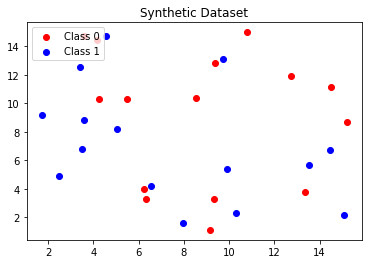

In [4]:
plt.scatter([i[0] for i in class0],[i[1] for i in class0],color='r',label="Class 0")
plt.scatter([i[0] for i in class1],[i[1] for i in class1],color='b',label="Class 1")
plt.title('Synthetic Dataset')
plt.legend(loc='upper left')
plt.show()

## Taking the test point as (6,12)

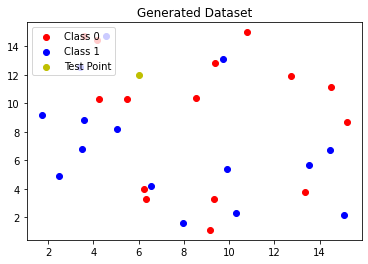

In [5]:
plt.scatter([i[0] for i in class0],[i[1] for i in class0],color='r',label="Class 0")
plt.scatter([i[0] for i in class1],[i[1] for i in class1],color='b',label="Class 1")
plt.scatter([6],[12],color='y',label="Test Point")
plt.title('Generated Dataset')
plt.legend(loc='upper left')
plt.show()

## Function for KNN

In [6]:
def knn(data,point,k):
    dist=[math.sqrt((point[0]-i[0])**2+(point[1]-i[1])**2) for i in data]
    dist, data = (list(t) for t in zip(*sorted(zip(dist, data))))
    data1=[i[-1] for i in data][:k]
    return max(data1,key=data1.count)

## Visualizing and predicting class for k=3

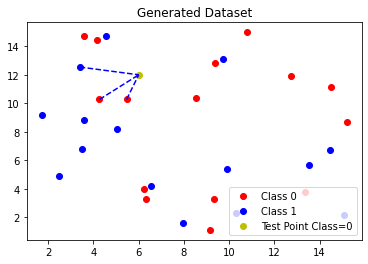

In [7]:
def knn_plot(data,point,k):
    dist=[math.sqrt((point[0]-i[0])**2+(point[1]-i[1])**2) for i in data]
    dist, data = (list(t) for t in zip(*sorted(zip(dist, data))))
    data1=[i[-1] for i in data][:k]
    return data[:k]
plt.scatter([i[0] for i in class0],[i[1] for i in class0],color='r',label="Class 0")
plt.scatter([i[0] for i in class1],[i[1] for i in class1],color='b',label="Class 1")
plt.scatter([6],[12],color='y',label="Test Point Class="+str(knn(data,(6,12),3)))
pts=knn_plot(data,(6,12),3)
plt.plot([pts[0][0],6],[pts[0][1],12],'--',color='b')
plt.plot([pts[1][0],6],[pts[1][1],12],'--',color='b')
plt.plot([pts[2][0],6],[pts[2][1],12],'--',color='b')
plt.title('Generated Dataset')
plt.legend(loc='lower right')
plt.show()

## Predicting the class for different values of K using KNN with test point (6,12)

In [8]:
for k in range(1,len(data)+1,2):
    print("K-VALUE:",str(k),"\nPredicted Class:",knn(data,(6,12),k))

K-VALUE: 1 
Predicted Class: 0
K-VALUE: 3 
Predicted Class: 0
K-VALUE: 5 
Predicted Class: 0
K-VALUE: 7 
Predicted Class: 0
K-VALUE: 9 
Predicted Class: 0
K-VALUE: 11 
Predicted Class: 0
K-VALUE: 13 
Predicted Class: 0
K-VALUE: 15 
Predicted Class: 0
K-VALUE: 17 
Predicted Class: 1
K-VALUE: 19 
Predicted Class: 1
K-VALUE: 21 
Predicted Class: 0
K-VALUE: 23 
Predicted Class: 0
K-VALUE: 25 
Predicted Class: 0
K-VALUE: 27 
Predicted Class: 1
K-VALUE: 29 
Predicted Class: 0


## Function for Weighted KNN algorithm

In [9]:
def weighted_knn(data,point,k):
    dist=[math.sqrt((point[0]-i[0])**2+(point[1]-i[1])**2) for i in data]
    wt=[1/i for i in dist]
    dist, data, wt = (list(t) for t in zip(*sorted(zip(dist, data, wt))))
    data1,wt=[i[-1] for i in data][:k],wt[:k]
    s=[sum(list(np.array(wt)[np.array(data1)==i]))/sum(wt) for i in range(max(data1)+1)]
    print("Weight value for each class:",s)
    return s.index(max(s))

## Visualization and predicting class for for K=3

Weight value for each class: [0.6004587794859918, 0.3995412205140081]


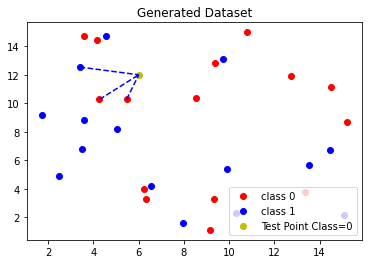

In [10]:
plt.scatter([i[0] for i in class0],[i[1] for i in class0],color='r',label="class 0")
plt.scatter([i[0] for i in class1],[i[1] for i in class1],color='b',label="class 1")
plt.scatter([6],[12],color='y',label="Test Point Class="+str(weighted_knn(data,(6,12),3)))
pts=knn_plot(data,(6,12),3)
plt.plot([pts[0][0],6],[pts[0][1],12],'--',color='b')
plt.plot([pts[1][0],6],[pts[1][1],12],'--',color='b')
plt.plot([pts[2][0],6],[pts[2][1],12],'--',color='b')
plt.title('Generated Dataset')
plt.legend(loc='lower right')
plt.show()

## Predicting the class for different values of K using weighted KNN with (6,12) as test point

In [11]:
for k in range(1,len(data)+1,2):
    print("K-VALUE:",str(k),"\nPredicted Class:",weighted_knn(data,(6,12),k))

Weight value for each class: [1.0]
K-VALUE: 1 
Predicted Class: 0
Weight value for each class: [0.7192484083617224, 0.28075159163827745]
K-VALUE: 3 
Predicted Class: 0
Weight value for each class: [0.6489464966379251, 0.35105350336207475]
K-VALUE: 5 
Predicted Class: 0
Weight value for each class: [0.7314730003685086, 0.2685269996314913]
K-VALUE: 7 
Predicted Class: 0
Weight value for each class: [0.6951301438106211, 0.3048698561893788]
K-VALUE: 9 
Predicted Class: 0
Weight value for each class: [0.5989595593391814, 0.4010404406608185]
K-VALUE: 11 
Predicted Class: 0
Weight value for each class: [0.5876405292415254, 0.41235947075847446]
K-VALUE: 13 
Predicted Class: 0
Weight value for each class: [0.5784243617689728, 0.4215756382310271]
K-VALUE: 15 
Predicted Class: 0
Weight value for each class: [0.5460105302846113, 0.4539894697153885]
K-VALUE: 17 
Predicted Class: 0
Weight value for each class: [0.543554631713127, 0.45644536828687304]
K-VALUE: 19 
Predicted Class: 0
Weight value for 